In [ ]:
!pip install face_recognition opencv-python numpy pandas


In [ ]:
import cv2
import face_recognition
import numpy as np
import os
from datetime import datetime


In [ ]:
import os

path = 'registered_faces'
images = []
classNames = []

if not os.path.exists(path):
    os.makedirs(path)
    print(f"Created directory: '{path}'. Please upload registered user images into this directory.")
else:
    myList = os.listdir(path)
    if not myList:
        print(f"Directory '{path}' is empty. Please upload registered user images into this directory.")
    else:
        print("Registered users:", myList)

        for cl in myList:
            curImg = cv2.imread(f'{path}/{cl}')
            images.append(curImg)
            classNames.append(os.path.splitext(cl)[0])

Registered users: ['sara.jpg', 'mohit.jpg']


In [ ]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encodes = face_recognition.face_encodings(img)
        if encodes:
            encodeList.append(encodes[0])
    return encodeList


In [ ]:
print("Encoding faces...")
encodeListKnown = findEncodings(images)
print("Encoding complete")


Encoding faces...
Encoding complete


In [ ]:
def markAttendance(name):
    if not os.path.exists('attendance.csv'):
        with open('attendance.csv', 'w') as f:
            f.write("Name,Date,Time\n")

    with open('attendance.csv', 'r+') as f:
        lines = f.readlines()
        names = [line.split(',')[0] for line in lines]

        if name not in names:
            now = datetime.now()
            date = now.strftime('%Y-%m-%d')
            time = now.strftime('%H:%M:%S')
            f.write(f"{name},{date},{time}\n")
            print(f"Attendance marked for {name}")


In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to read frame from camera. Exiting.")
        break

    imgSmall = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgSmall = cv2.cvtColor(imgSmall, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgSmall)
    encodesCurFrame = face_recognition.face_encodings(imgSmall, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        name = "Unknown"

        if encodeListKnown:
            matches = face_recognition.compare_faces(encodeListKnown, encodeFace, tolerance=0.6)
            faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)

            if len(faceDis) > 0:
                matchIndex = np.argmin(faceDis)
                if matches[matchIndex]:
                    name = classNames[matchIndex]
                    markAttendance(name)
        else:
            name = "Unknown (No registered faces)"

        y1, x2, y2, x1 = faceLoc
        y1, x2, y2, x1 = y1*4, x2*4, y2*4, x1*4

        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(img, name, (x1+6,y2-6),
                    cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 2)

    cv2.imshow("Face Attendance System", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Failed to read frame from camera. Exiting.


First, let's move the `rahul.jpg` and `test.jpg` files from the `/content` directory to the `student_images` directory so they can be processed as known faces. If you have other student images, please upload them directly to `student_images`.

In [ ]:
import shutil
import os

source_dir = '/content'
registered_faces_dir = 'registered_faces'
test_images_dir = 'test_images'

if not os.path.exists(registered_faces_dir):
    os.makedirs(registered_faces_dir)
    print(f"Created directory: '{registered_faces_dir}'")

if not os.path.exists(test_images_dir):
    os.makedirs(test_images_dir)
    print(f"Created directory: '{test_images_dir}'")

rahul_src_path = os.path.join(source_dir, 'rahul.jpg')
rahul_dest_path = os.path.join(registered_faces_dir, 'rahul.jpg')
if os.path.exists(rahul_src_path) and not os.path.exists(rahul_dest_path):
    shutil.move(rahul_src_path, rahul_dest_path)
    print(f"Moved rahul.jpg to {registered_faces_dir}")
elif os.path.exists(rahul_dest_path):
    print(f"rahul.jpg already exists in {registered_faces_dir}")
else:
    print(f"rahul.jpg not found in {source_dir}")

test_src_path = os.path.join(source_dir, 'test.jpg')
test_dest_path = os.path.join(test_images_dir, 'test.jpg')
if os.path.exists(test_src_path) and not os.path.exists(test_dest_path):
    shutil.move(test_src_path, test_dest_path)
    print(f"Moved test.jpg to {test_images_dir}")
elif os.path.exists(test_dest_path):
    print(f"test.jpg already exists in {test_images_dir}")
else:
    print(f"test.jpg not found in {source_dir}")

old_student_images_dir = 'student_images'
if os.path.exists(old_student_images_dir) and not os.listdir(old_student_images_dir):
    os.rmdir(old_student_images_dir)
    print(f"Removed empty directory: '{old_student_images_dir}'")

rahul.jpg not found in /content
test.jpg already exists in test_images


Now that the images are in the correct directory, please **rerun the following cells in order** to load and encode the faces:

1.  **Cell `GYmRvxx1q3xn`:** This cell lists files in `student_images` and loads them.
2.  **Cell `z71wo4g7rGhV`:** This cell defines the `findEncodings` function.
3.  **Cell `51u8k9uprOS4`:** This cell calls `findEncodings` to create `encodeListKnown`.

Since direct webcam access and live `cv2.imshow` are problematic in Colab, we will modify the approach to perform face recognition on a *static image* instead. This code will load `test.jpg` (or any other image you specify from `student_images` or `/content`), detect faces, and display the result using `google.colab.patches.cv2_imshow`.

Attendance marked for mohit
Processed test image. Displaying result...


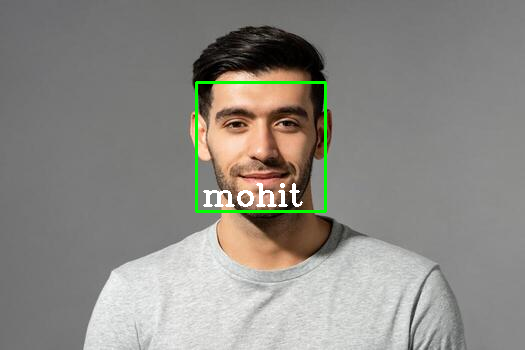

In [ ]:
from google.colab.patches import cv2_imshow

test_image_path = 'test_images/test.jpg'

if not os.path.exists(test_image_path):
    print(f"Error: Test image '{test_image_path}' not found. Please ensure the image exists in the 'test_images' folder.")
else:
    img_test = cv2.imread(test_image_path)
    if img_test is None:
        print(f"Error: Could not load image from {test_image_path}. Check file integrity.")
    else:
        img_test_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

        faces_in_test = face_recognition.face_locations(img_test_rgb)
        encodes_in_test = face_recognition.face_encodings(img_test_rgb, faces_in_test)

        if not faces_in_test:
            print("No faces found in the test image.")
        else:
            for encode_face_test, face_loc_test in zip(encodes_in_test, faces_in_test):
                name = "Unknown"

                if encodeListKnown:
                    matches = face_recognition.compare_faces(encodeListKnown, encode_face_test, tolerance=0.75)
                    face_distances = face_recognition.face_distance(encodeListKnown, encode_face_test)

                    if len(face_distances) > 0:
                        match_index = np.argmin(face_distances)
                        if matches[match_index]:
                            name = classNames[match_index]
                            markAttendance(name)
                else:
                    name = "Unknown (No registered faces)"

                y1, x2, y2, x1 = face_loc_test
                cv2.rectangle(img_test, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img_test, name, (x1 + 6, y2 - 6),
                            cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

            print("Processed test image. Displaying result...")
            cv2_imshow(img_test)